In [1]:
import numpy as np
import tensorflow as tf

We want to replicate:
F = 1.8*C + 32

In [2]:
#Data:
Celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
Fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)


In [3]:
#Only one layer and one unit ("linear regression!")

layer = tf.keras.layers.Dense(units = 1, input_shape = [1]) #for the first hidden layer we have to give a input shape

In [4]:
#Create the model with the declared layers
model = tf.keras.Sequential([layer])

In [5]:
#Compile the model (mean squared error for regression problems)
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [6]:
#Model structure:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Train!
history = model.fit(Celsius, Fahrenheit, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 1s 962ms/step - loss: 1801.3982
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 1664.2665
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 1538.9006
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 1425.4579
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 1324.0184
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 1234.5658
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 1156.9695
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 1090.9674
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 1036.1476
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 991.9335
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 957.5743
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 932.1451
Epoch 13/1000


In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'History')

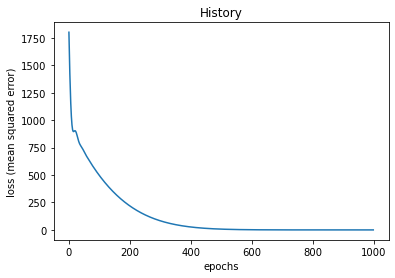

In [11]:
#Plot
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss (mean squared error)')
plt.title('History')

In [12]:
#Predict: Good enough!
model.predict([100]) 

1/1 [==============================] - 0s 184ms/step


array([[211.7438]], dtype=float32)

In [13]:
#Weights and bias are almost idential to the real values for the conversion formula
print(layer.get_weights())

[array([[1.7981529]], dtype=float32), array([31.928514], dtype=float32)]


In [14]:
#Try to do the same with a more complex model

In [13]:
layer1 = tf.keras.layers.Dense(units = 10, input_shape = [1])
layer2 = tf.keras.layers.Dense(units = 1)

In [14]:
#Create the model with the declared layers
model = tf.keras.Sequential([layer1, layer2])

In [15]:
#Compile the model (mean squared error for regression problems)
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [16]:
#Try to think how many parameters should the model have!
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [17]:
#It has 10 weights for the first layer and 10 biases. For the output (second layer) it has
#10 weights as it is connected to the 10 previus neurons and 1 bias. This adds up to 31

In [18]:
#Train!
history = model.fit(Celsius, Fahrenheit, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 284ms/step - loss: 2168.4761
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 1219.8099
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 914.8226
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 1122.9724
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 1217.0052
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 1049.3376
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 853.3249
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 777.3775
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 819.7051
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 873.4854
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 856.2725
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 774.2020
Epoch 13/1000
1/1 

In [15]:
#Predict: Good enough!
model.predict([100]) 

1/1 [==============================] - 0s 69ms/step


array([[211.7438]], dtype=float32)

In [16]:
#Weights are no longer interpretable
print(layer.get_weights())

[array([[1.7981529]], dtype=float32), array([31.928514], dtype=float32)]
